**Importing all libraries**

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
!unzip /content/cereal.csv

Archive:  /content/cereal.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/cereal.csv or
        /content/cereal.csv.zip, and cannot find /content/cereal.csv.ZIP, period.


**Reading the dataset**

In [5]:
data = pd.read_csv('/content/cereal.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


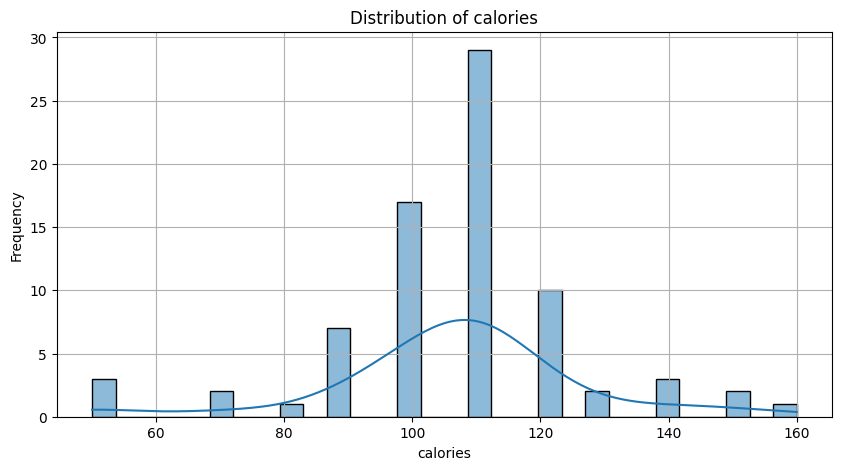

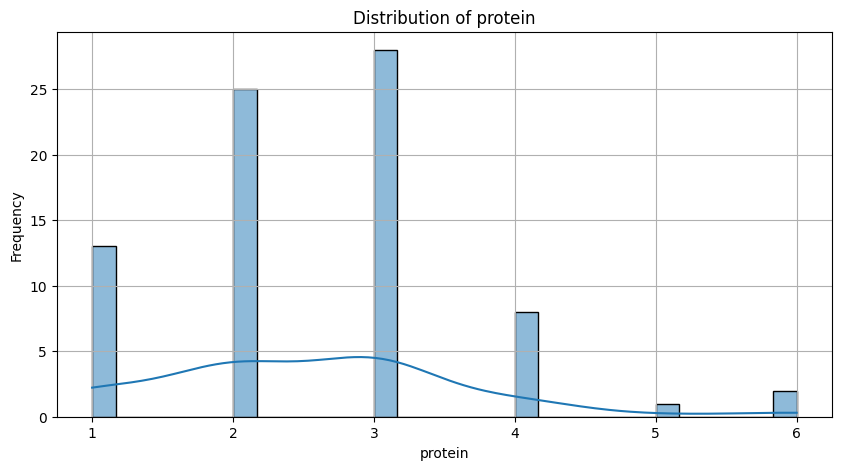

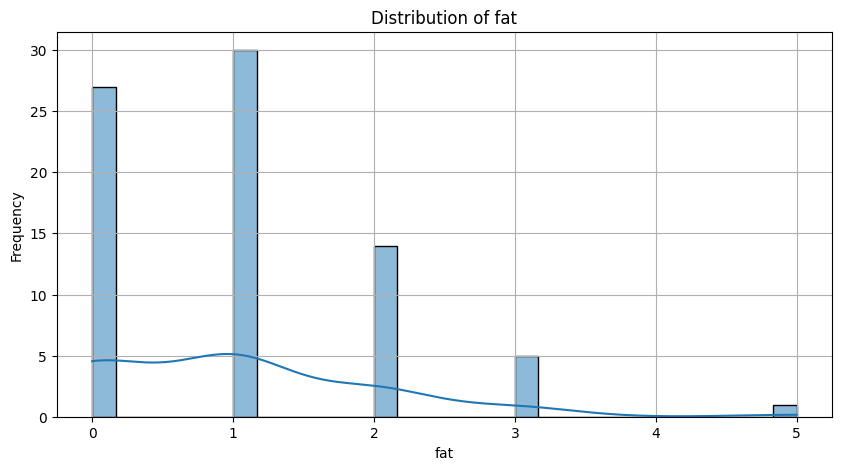

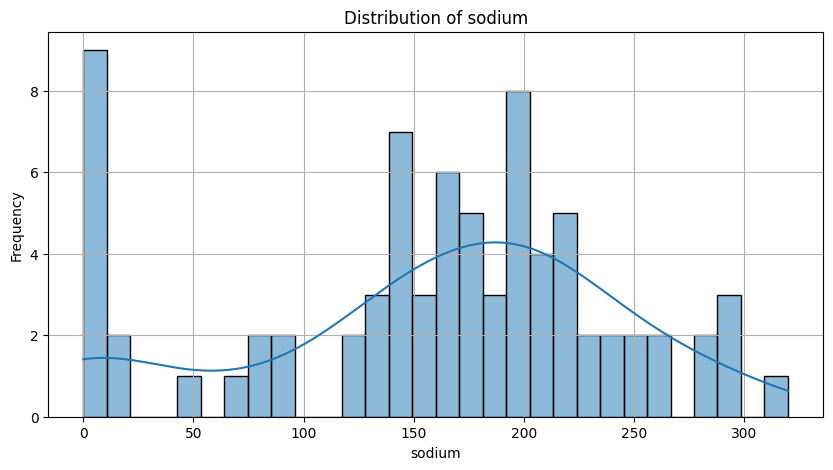

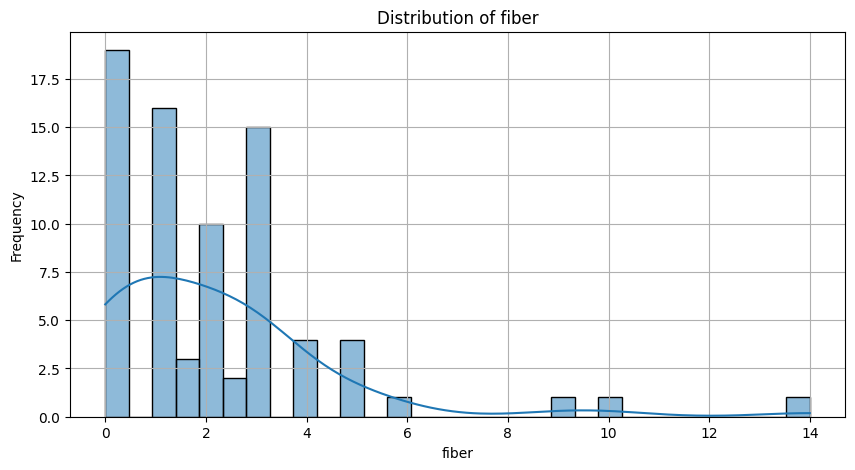

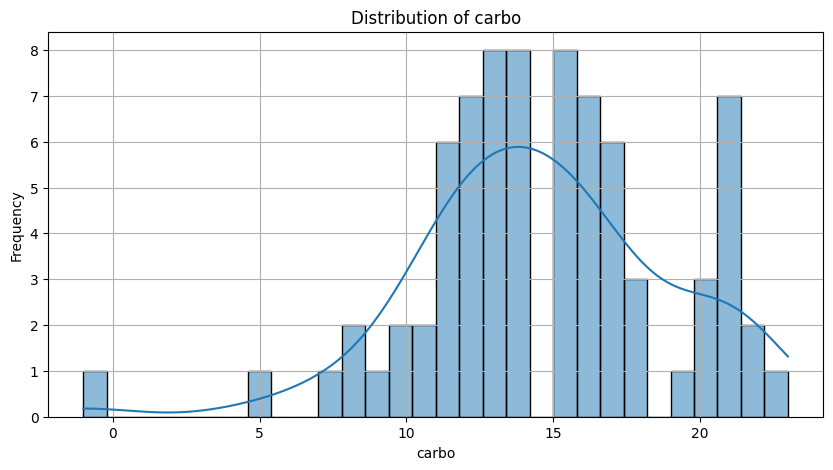

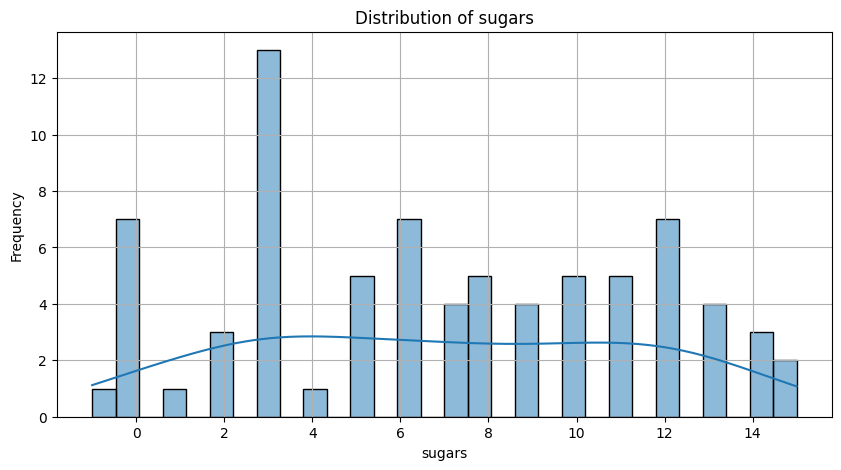

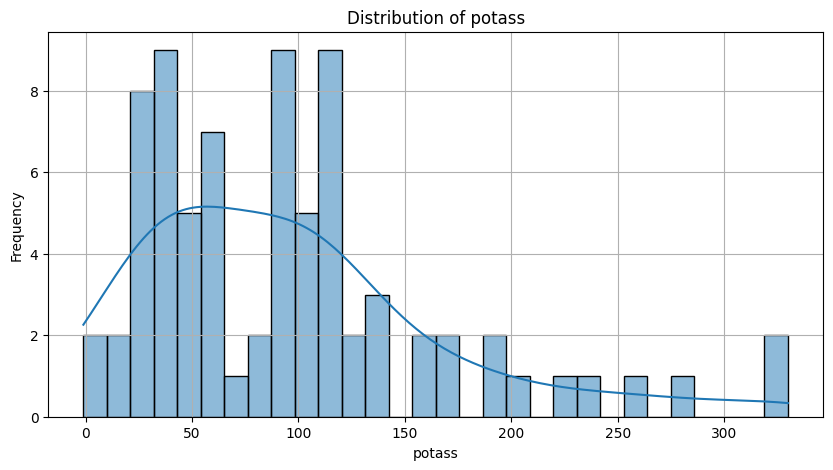

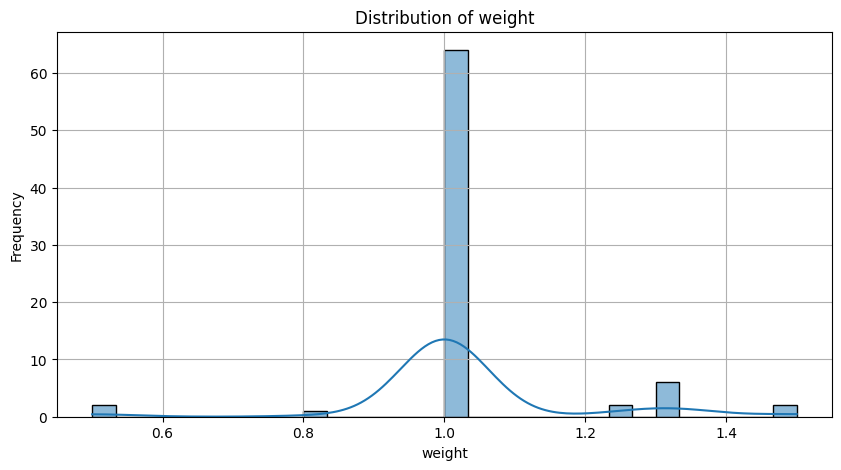

In [6]:
numerical_features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'weight']

# Plotting distributions of numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

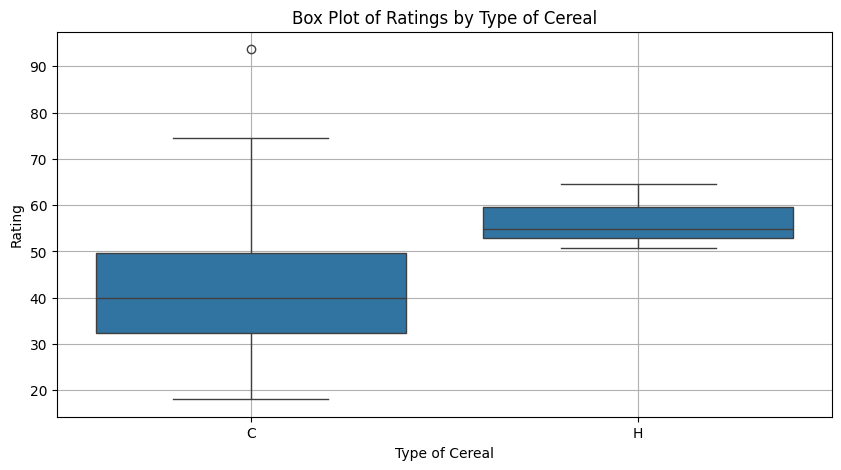

In [ ]:
numerical_features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'weight']
plt.figure(figsize=(10, 5))
sns.boxplot(data, x='type', y='rating')
plt.title('Box Plot of Ratings by Type of Cereal')
plt.xlabel('Type of Cereal')
plt.ylabel('Rating')
plt.grid()
plt.show()

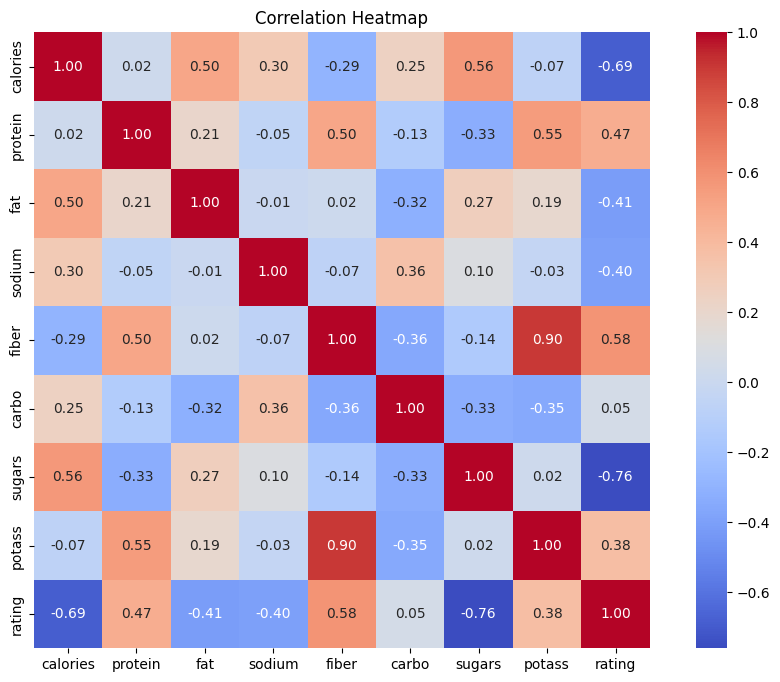

In [72]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
data.isnull().any()

,0
name,False
mfr,False
type,False
calories,False
protein,False
fat,False
sodium,False
fiber,False
carbo,False
sugars,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
for i in data:
    print(data[i].unique())

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

In [10]:
data.drop(["name"], axis =1, inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["mfr"] = le.fit_transform(data["mfr"])
data["type"] = le.fit_transform(data["type"])



In [12]:
wind_gust_dir_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(wind_gust_dir_mapping)

{'C': 0, 'H': 1}


In [13]:
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [14]:
data["mfr"].unique()

array([3, 5, 2, 6, 1, 4, 0])

In [15]:
data["type"].unique()

array([0, 1])

In [16]:
data.corr()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,1.000000,-0.007103,-0.076328,0.017059,0.077661,-0.175791,0.056159,-0.063045,-0.132900,-0.003241,-0.274766,0.003323,-0.240092,-0.066967,0.140942
type,-0.007103,1.000000,-0.071596,0.269265,-0.002615,-0.321552,-0.078114,-0.123023,-0.285219,-0.079825,-0.180633,-0.131730,-0.039880,0.060057,0.203024
calories,-0.076328,-0.071596,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.017059,0.269265,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.077661,-0.002615,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,-0.175791,-0.321552,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,0.056159,-0.078114,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,-0.063045,-0.123023,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,-0.132900,-0.285219,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.003241,-0.079825,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165


<Axes: >

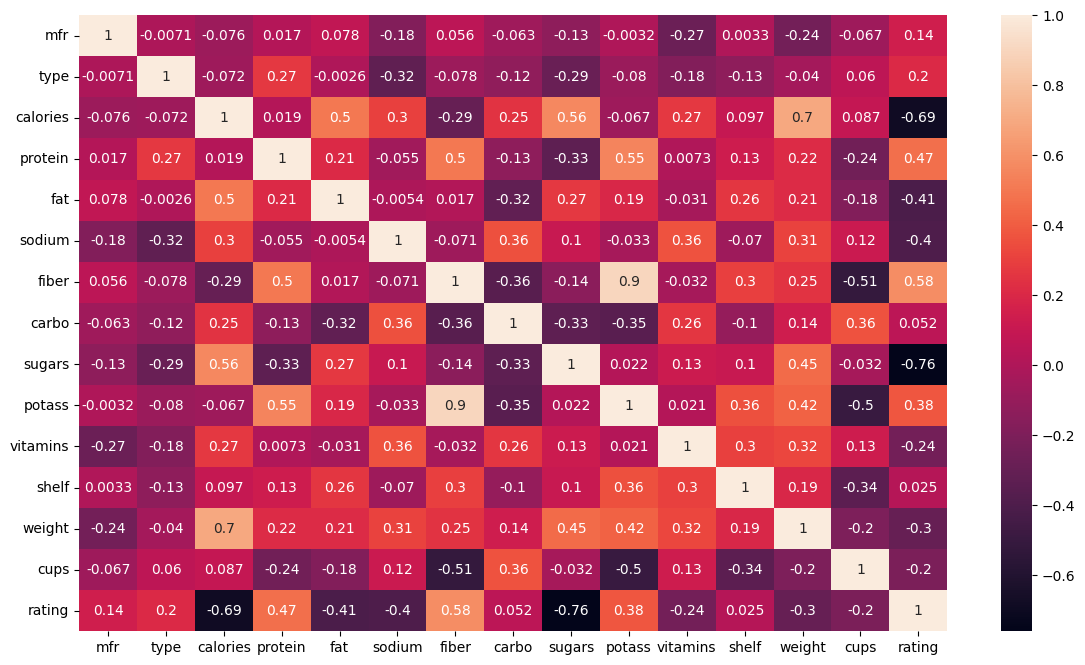

In [ ]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot=True)

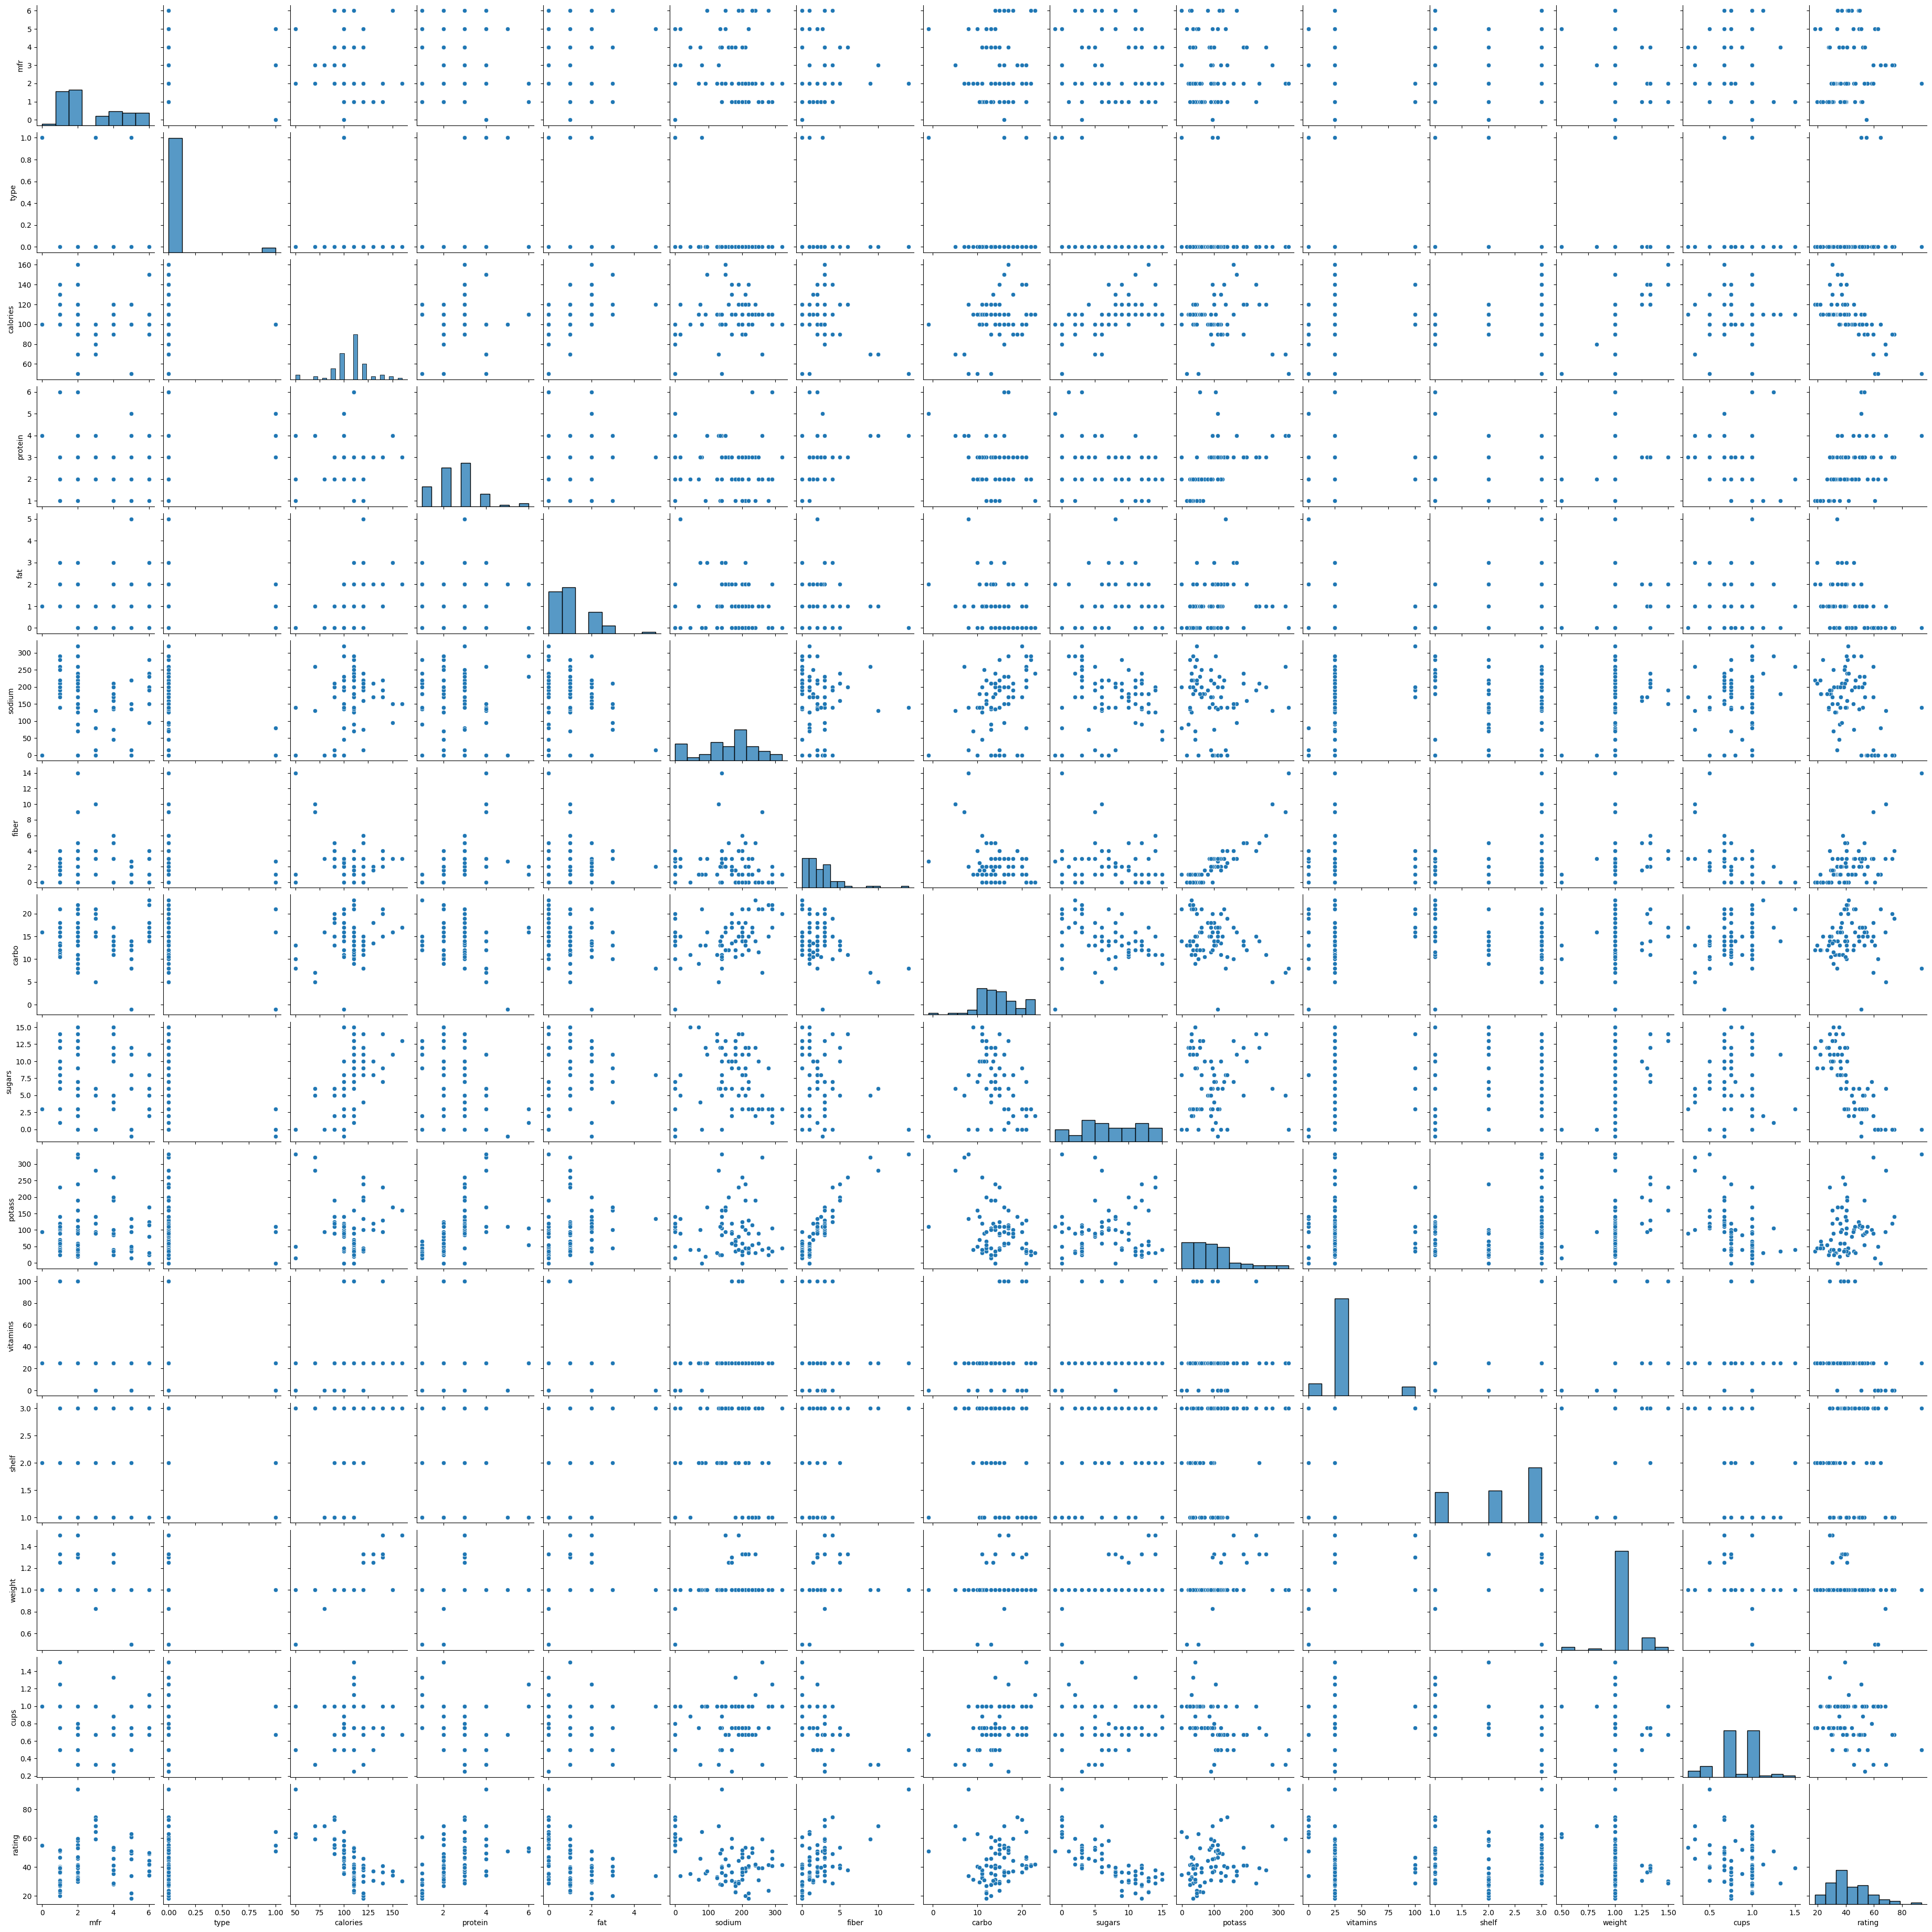

In [ ]:
sns.pairplot(data)

In [17]:
data["type"] = le.fit_transform(data["type"])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='mfr', ylabel='rating'>

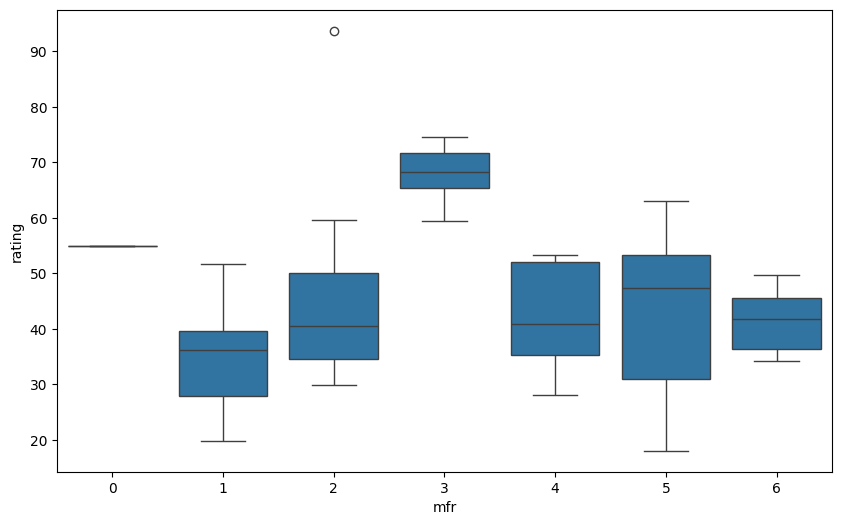

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = "mfr", y = "rating")

In [44]:
x= data.iloc[:,0:14]
y= data.iloc[:,14:15]

In [21]:
x

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [20]:
x.shape

(77, 14)

In [22]:
y

,rating
0,68.402973
1,33.983679
2,59.425505
3,93.704912
4,34.384843
...,...
72,39.106174
73,27.753301
74,49.787445
75,51.592193


In [45]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one = OneHotEncoder()
# Use .iloc to select the first column of the DataFrame 'x' for OneHotEncoding
a = one.fit_transform(x.iloc[:,0:1]).toarray()
x = np.delete(x.values,[0],axis=1) # Convert x to a NumPy array before using np.delete
x=np.concatenate((a,x),axis=1)

In [77]:
selected_columns = ['mfr','type','calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups']
x = data[selected_columns]
y = data['rating']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
LinearRegression()

LinearRegression()

In [81]:
lr_pred = lr.predict(x_test)

In [82]:
lr_pred

array([29.92428516, 49.78744509, 39.70339957, 60.75611174, 45.81171583,
       58.34514158, 59.36399362, 53.37100726, 34.13976435, 38.83974526,
       40.91704689, 55.33314193, 93.7049128 , 26.73451536, 54.85091692,
       37.03856174])

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.9999999999999992

In [85]:
y_p = lr.predict([[0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
y_p

array([68.40297303])

In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

# Create a synthetic dataset for demonstration
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('linear', LinearRegression())  # Initialize Linear Regression
])

# Fit the model directly, no need for hyperparameter tuning in this case
pipeline.fit(X_train, y_train)

# Prediction using the model
linear_pred = pipeline.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, linear_pred))
print("R² Score:", r2_score(y_test, linear_pred))

# Calculate accuracy using R² score
accuracy = r2_score(y_test, linear_pred)
print("R² Score (Accuracy):", accuracy)


MSE: 0.011427751339300353
R² Score: 0.9999997047756003
R² Score (Accuracy): 0.9999997047756003


In [194]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

# Create a synthetic dataset for demonstration
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge())              # Initialize Ridge Regression
])

# Fit the model directly
pipeline.fit(X_train, y_train)

# Prediction using the model
ridge_pred = pipeline.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R² Score:", r2_score(y_test, ridge_pred))

# Calculate accuracy using R² score
accuracy = r2_score(y_test, ridge_pred)
print("R² Score (Accuracy):", accuracy)


MSE: 0.0720158246881738
R² Score: 0.9999981395439939
R² Score (Accuracy): 0.9999981395439939


In [199]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

# Create a synthetic dataset for demonstration
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and Lasso Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', Lasso())              # Initialize Lasso Regression
])

# Define hyperparameter grid for Lasso Regression
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Lasso model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Prediction using the best model
lasso_pred = best_model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))

# Calculate accuracy using R² score
accuracy = r2_score(y_test, lasso_pred)
print("R² Score (Accuracy):", accuracy)
print("Best Parameters:", grid_search.best_params_)


MSE: 0.012321835829863403
R² Score: 0.9999996816778316
R² Score (Accuracy): 0.9999996816778316
Best Parameters: {'lasso__alpha': 0.01}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the best hyperparameters found from the grid search
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=30, max_features='log2',
                                 min_samples_leaf=1, min_samples_split=2)

# Fit the Decision Tree model using the best hyperparameters
best_dt.fit(X_train, y_train)

# Predict the test data
y_pred_dt = best_dt.predict(X_test)

# Print Accuracy
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
import pickle
pickle.dump(lr,open("cerealanalysis.pkl" , "wb"))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error